<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet5_FC_LRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Tâche 1 : LRP appliqué à un réseau de neurones entièrement connecté (FC)**

Dans cette tâche, l'objectif est de calculer la pertinence (relevance) pour des éléments spécifiques d'un petit réseau de neurones entièrement connecté. Le réseau est composé uniquement d'une couche d'entrée (ses neurones sont indexés par ($i$),d'une couche cachée ($j$) et d'une couche de sortie ($k$). $x_i$ représente les valeurs des neurones d'entrée, $x_j$ les sorties des neurones de la couche cachée, et $x_k$ les sorties des neurones de la couche de sortie. La fonction non linéaire de la couche cachée est la ReLU, exprimée par l'équation
$x_j = max(0, \sum_i x_i w_{ij} + b_j)$. $w_{ij}\:$ désigne les poids entre la  $i-$ième et la $j-$ième couche, et $b_j$ le biais (ce dernier est omis dans cette tâche). La fonction non linéaire effectuée par la couche de sortie est la fonction de somme, exprimée par $x_k = \sum_j x_j$.L'architecture globale du réseau est illustrée dans la première figure, et le fonctionnement de chaque neurone est décrit dans la deuxième.

Cette tâche n'utilise pas de jeu de données prédéfini. Les utilisateurs sélectionneront les entrées du réseau de neurones ainsi que les poids. Nous encourageons les utilisateurs à essayer autant de combinaisons possibles d'entrées et de poids. La méthode LRP sera appliquée pour calculer la pertinence de chaque neurone et des entrées.


In [ ]:
################################################################################
# [0.] Installation of the necessary packages ==================================
################################################################################

!pip3 install scipy
!pip3 install matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving téléchargement.png to téléchargement (1).png


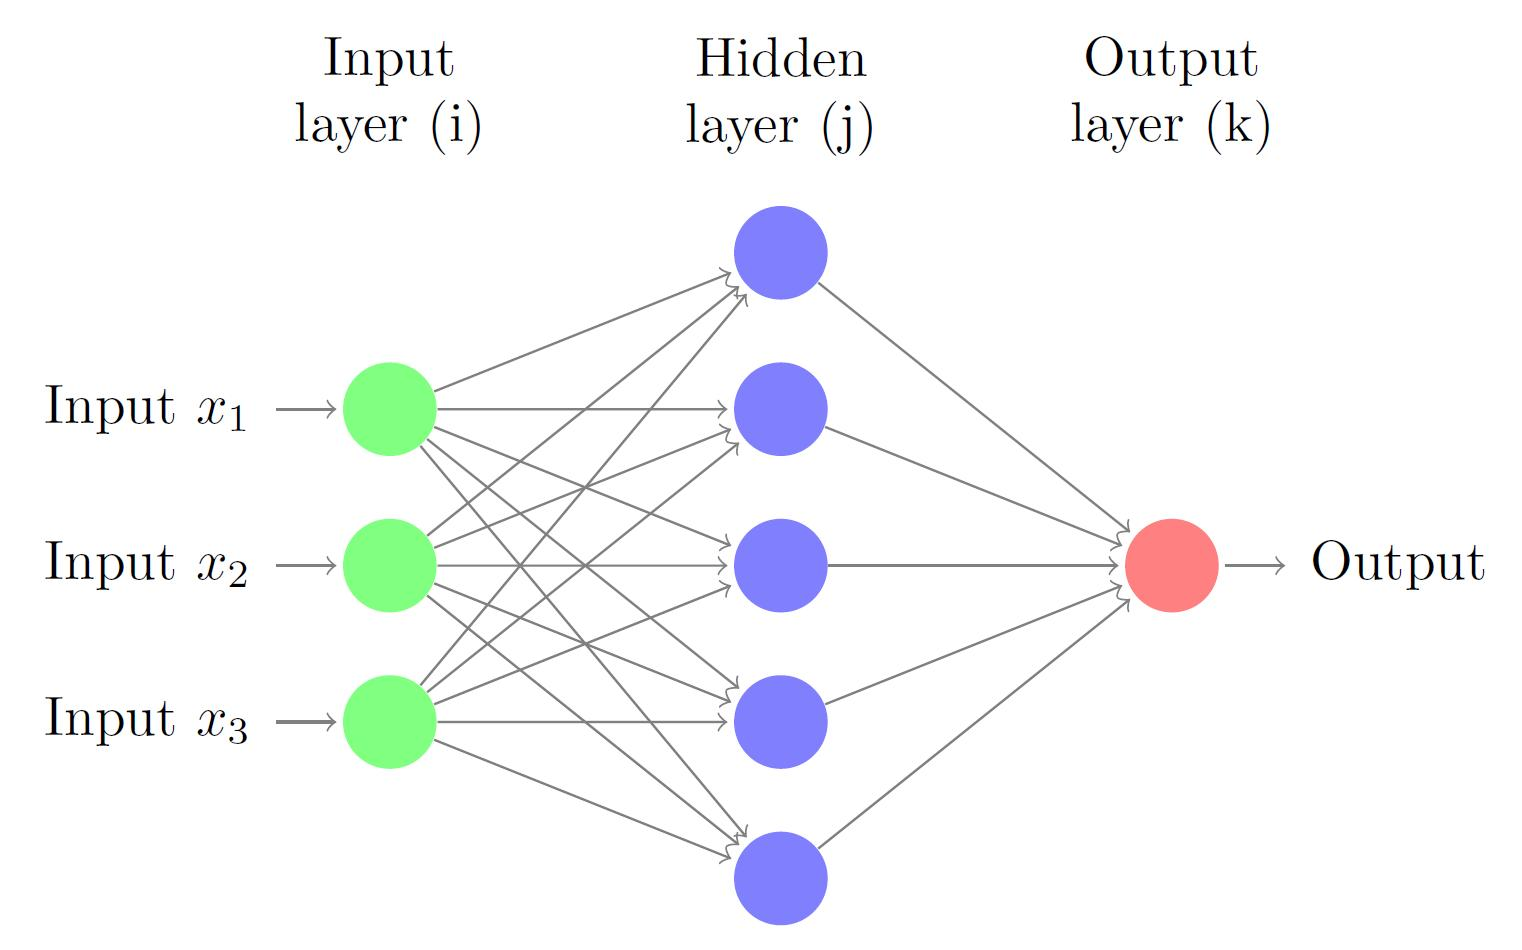

In [ ]:
################################################################################
# Figure de l'architecture globale du réseau FC=========================
################################################################################

from IPython.display import Image
Image('téléchargement.png')


In [ ]:
################################################################################
# Mathematical euqations for the computation of relevances (R) =================
# in the output (k), hidden (j) and input (i) layer. ===========================
################################################################################
from IPython.display import Math, HTML

# The output layer's (k) output is the sum of the all inputs x_j ---------------
# The relevance R_k of the neuron in this layer --------------------------------
# is also the sum of all its inputs --------------------------------------------

# The output x_j of each neuron in layer (j) -----------------------------------
# (each of them is subscripted with j) -----------------------------------------
# is either zero or equals to the sum of the weighted inputs -------------------
# plus the bias term -----------------------------------------------------------

Math(r'x_j = max(0, \sum_i x_i w_{ij} + b_j) \\ R_k = x_k = \sum_j x_j \\ ')

<IPython.core.display.Math object>

In [ ]:
# The relevance of each neuron j in layer (j) is R_j. --------------------------
# This can be deduced from the equation that computes x_j ----------------------
# and by the observation that the root point (x_tilde) equals to zero. ---------

from IPython.display import Math

Math(r'R_j = R_k(\tilde{\mathbf{x}}) + \frac{\partial R_k}{\partial x_j} \biggr\rvert_{\{ \tilde{x}_j \}} \cdot (x_j - \tilde{x}_j) = x_j = max(0, \sum_i x_i w_{ij} + b_j) \\' )




<IPython.core.display.Math object>

In [ ]:
# The relevance of each neuron i in layer (i), which is practically the input --
# is R_i. The mathematical equations behind this computation -------------------
# can be found in the referenced sources and are out of scope of this ----------
# task. What is important to emphasize is that the relevance is proportional ---
# to the power of the weights - remember that the weights can be ---------------
# positive and negative --------------------------------------------------------

from IPython.display import Math

Math(r'R_i = \sum_j \frac{w_{ij}^2}{\sum_{\'{i}}} w_{\acute{\'{i}}j}^2} R_j')

<IPython.core.display.Math object>

💻 Dans ce code, le réseau de neurones se compose des couches suivantes :

📌 La **couche d'entrée** est définie par les variables dans `x_i_dict`, qui contient 3 neurones

📌 La **couche cachée** est composée de 5 neurones (`w_j_1_dict, w_j_2_dict, w_j_3_dict, w_j_4_dict, w_j_5_dict`), comme en témoignent les dictionnaires définis pour chaque ensemble de poids reliant les entrées $(x_i)$ aux neurones cachés $(x_j)$

📌 La **couche de sortie** est définie par les poids `w_k_dict`, qui relient les 5 neurones de la couche cachée $(x_j)$  à un seul neurone de sortie $(x_k)$

Ce réseau est  un exemple de réseau entièrement connecté avec une architecture de type 3 → 5 → 1.

💡 Le dictionnaire `w_j_1_dict = {'w_i1_j1': -0.2, 'w_i2_j1': 0.5, 'w_i3_j1': -0.1}`  représente les poids connectant chaque neurone de la couche d'entrée à un neurone spécifique de la couche cachée.


*   w_i1_j1: Poids entre le neurone $x_1$ (entrée) et $x_{j1}$ (caché)
*   w_i2_j1: Poids entre le neurone $x_2$ (entrée) et $x_{j1}$ (caché)
*   w_i3_j1: Poids entre le neurone $x_3$ (entrée) et $x_{j1}$ (caché)


# Formule réelle pour calculer $x_j$

Les poids influencent la manière dont les informations de la couche d'entrée sont combinées dans la couche cachée. Chaque neurone caché $(x_{j1}, x_{j2}, x_{j3})$ calcule une somme pondérée des entrées suivant la **formule** : $x_j = \text{ReLU}\left(\sum_{i} x_i \cdot w_{ij} + b_j\right)$.

🔍 Par exemple avec les poids définis dans `w_j_1_dict` et les valeurs d'entrée $(x_1 = 2, x_2 = 5, x_3 = 50)$
$$
x_{j1} = \text{ReLU}\left(x_1 \cdot (-0.2) + x_2 \cdot 0.5 + x_3 \cdot (-0.1)\right)
$$

$$
x_{j1} = \text{ReLU}\left((2) \cdot (-0.2) + (5) \cdot 0.5 + (50) \cdot (-0.1)\right)
$$
Cette formule n'est pas utilisé dans ce code.

# Différence dans ce code

`x_j_1_normal`, `x_j_2_normal`, ..etc sont générés aléatoirement, suivant une distribution de notre choix et n'ont aucune dépendance aux poids ou entrées définis dans le réseau.

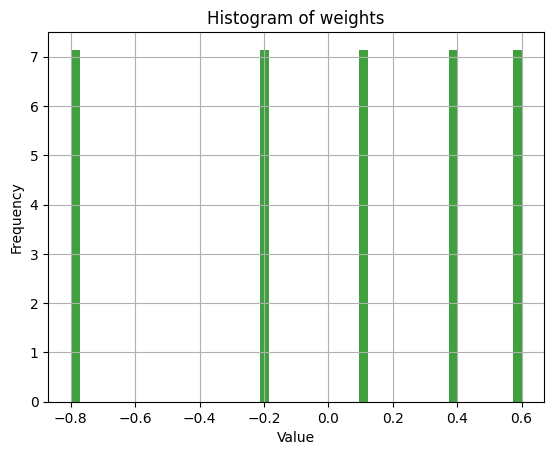

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# [1.] Define input, weights ===================================================
#      and see their distribution with a histogram =============================
################################################################################

# i: input layer, j: hidden layer, k: output layer

# 1.1. Values selected by user -------------------------------------------------
x_i_dict = {'x_1': 15, 'x_2': 2, 'x_3': -8}

w_j_1_dict = {'w_i1_j1': -0.2, 'w_i2_j1': 0.5, 'w_i3_j1': -0.1}
w_j_2_dict = {'w_i1_j2': -0.25, 'w_i2_j2': 0.1, 'w_i3_j2': 0.4}
w_j_3_dict = {'w_i1_j3': 0.2, 'w_i2_j3': -0.3, 'w_i3_j3': -0.2}
w_j_4_dict = {'w_i1_j4': 0.5, 'w_i2_j4': -0.8, 'w_i3_j4': 0.6}
w_j_5_dict = {'w_i1_j5': 0.1, 'w_i2_j5': 0.4, 'w_i3_j5': 0.7}

w_k_dict = {'w_j1_k1': -0.8, 'w_j2_k1': 0.1, 'w_j3_k1': -0.2,
            'w_j4_k1': 0.4, 'w_j5_k1': 0.6}


# 1.2. Randomly (Normally distributed) values ----------------------------------
mu, sigma = 0, 0.05
x_i_normal = np.random.normal(mu, sigma, 3)

x_j_1_normal = np.random.normal(mu, sigma, 3)
x_j_2_normal = np.random.normal(mu, sigma, 3)
x_j_3_normal = np.random.normal(mu, sigma, 3)
x_j_4_normal = np.random.normal(mu, sigma, 3)
x_j_5_normal = np.random.normal(mu, sigma, 3)

x_k_normal = np.random.normal(mu, sigma, 5)


# Histogram of weights ---------------------------------------------------------
n, bins, patches = plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of weights')
plt.grid(True)
plt.show()

L'objectif de la tâche est d'encourager l'utilisateur à sélectionner les valeurs des entrées ainsi que les valeurs des poids, soit de manière aléatoire, soit de manière intentionnelle, et d'observer comment la sortie des neurones, ainsi que les pertinences, varient en fonction de ces changements.

Les variables "x_i_dict", "w_j_1_dict" ... "w_j_5_dict", "w_k_dict" correspondent aux variables définies dans les équations mathématiques mentionnées ci-dessus. L'utilisateur peut également générer des poids suivant une distribution donnée ou complètement aléatoire. Dans cet exemple, nous les définissons selon une distribution gaussienne, mais cela peut être facilement remplacé par une autre méthode.




---


💡 On a implémente de  la **propagation** avant (feedforward pass) dans un réseau de **neurones simple.**

Les variables $( \text{sum}_{j1}, \text{sum}_{j2}, \dots, \text{sum}_{j5} )$ représentent les sommations pondérées des entrées $( x_i)$ et des poids $( w_{ij})$. Pour chaque neurone $x_j$​, la formule utilisée est la suivante :
$$
\text{sum}_j = \sum_{i} x_i \cdot w_{ij}
$$
La sortie du réseau est calculée en additionnant les valeurs $(\text{val}_{j1}, \text{val}_{j2}, \dots, \text{val}_{j5})$ obtenues après l'application de la fonction ReLU :
$$
\text{val}_{k1} = \sum_{j} \text{val}_{j}
$$




In [ ]:
################################################################################
# [2.] Compute equations of feedforward pass ===================================
# Apply those equations to compute the output of the network ===================
################################################################################
sum_j1 = x_i_dict['x_1'] * w_j_1_dict['w_i1_j1'] + \
         x_i_dict['x_2'] * w_j_1_dict['w_i2_j1'] + \
         x_i_dict['x_3'] * w_j_1_dict['w_i3_j1']

sum_j2 = x_i_dict['x_1'] * w_j_2_dict['w_i1_j2'] + \
         x_i_dict['x_2'] * w_j_2_dict['w_i2_j2'] + \
         x_i_dict['x_3'] * w_j_2_dict['w_i3_j2']

sum_j3 = x_i_dict['x_1'] * w_j_3_dict['w_i1_j3'] + \
         x_i_dict['x_2'] * w_j_3_dict['w_i2_j3'] + \
         x_i_dict['x_3'] * w_j_3_dict['w_i3_j3']

sum_j4 = x_i_dict['x_1'] * w_j_4_dict['w_i1_j4'] + \
         x_i_dict['x_2'] * w_j_4_dict['w_i2_j4'] + \
         x_i_dict['x_3'] * w_j_4_dict['w_i3_j4']

sum_j5 = x_i_dict['x_1'] * w_j_5_dict['w_i1_j5'] + \
         x_i_dict['x_2'] * w_j_5_dict['w_i2_j5'] + \
         x_i_dict['x_3'] * w_j_5_dict['w_i3_j5']

# Apply ReLU -------------------------------------------------------------------
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

# Compute the output of the NN -------------------------------------------------
val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Output value of the network: {val_k1}")


Output value of the network: 5.1000000000000005


💡La partie suivante  implémente le calcul des pertinences (relevances) dans chaque couche du réseau de neurones, en suivant les principes de **Layer-Wise Relevance Propagation (LRP).**

🔍Les pertinences des neurones de la couche d'entrée sont calculées en utilisant une règle basée sur les poids entre les couches: $$\text{sum}_j = \sum_{i} w_{ij}^2 $$ ça sert à normaliser la pertinence redistribuée.

🔍 Ensuite, **la redistribution de la pertinence** pour
 chaque neurone d'entrée $(i1,i2,i3)$, est calculée en redistribuant les pertinences des neurones $j$ en fonction des poids connectés : $$
R_{i1} = \sum_{j} \left( \frac{w_{ij}^2}{\sum_{i'} w_{i'j}^2} \cdot R_j \right)
$$


Les pertinences $( R_{i1}, R_{i2}, R_{i3} )$ reflètent l'importance de chaque neurone d'entrée dans la décision finale du réseau.


In [ ]:
################################################################################
################################################################################
################################################################################
# [3.] Compute the relevances of each neuron in all layers =====================
# The relevances computations follow the mathematical formulas defined above. ==
################################################################################
################################################################################
################################################################################

################################################################################
# [3.1] Compute relevance of output layer (k) ==================================
################################################################################
R_k = val_k1

print(f"Relevances of neurons of k layer: {R_k}")

################################################################################
# [3.2] Compute relevance of every one of the 5 neurons of the layer (j) =======
################################################################################
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Relevances of neurons of j layer: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")

################################################################################
# [3.3] Compute relevance of every one of the 3 neurons of the layer (i) =======
################################################################################
sum_j1_power = w_j_1_dict['w_i1_j1'] ** 2 + \
               w_j_1_dict['w_i2_j1'] ** 2 + \
               w_j_1_dict['w_i3_j1'] ** 2

sum_j2_power = w_j_2_dict['w_i1_j2'] ** 2 + \
               w_j_2_dict['w_i2_j2'] ** 2 + \
               w_j_2_dict['w_i3_j2'] ** 2

sum_j3_power = w_j_3_dict['w_i1_j3'] ** 2 + \
               w_j_3_dict['w_i2_j3'] ** 2 + \
               w_j_3_dict['w_i3_j3'] ** 2

sum_j4_power = w_j_4_dict['w_i1_j4'] ** 2 + \
               w_j_4_dict['w_i2_j4'] ** 2 + \
               w_j_4_dict['w_i3_j4'] ** 2

sum_j5_power = w_j_5_dict['w_i1_j5'] ** 2 + \
               w_j_5_dict['w_i2_j5'] ** 2 + \
               w_j_5_dict['w_i3_j5'] ** 2

R_i1 = ((w_j_1_dict['w_i1_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i1_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i1_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i1_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i1_j5'] ** 2) / sum_j5_power) * R_j5

R_i2 = ((w_j_1_dict['w_i2_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i2_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i2_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i2_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i2_j5'] ** 2) / sum_j5_power) * R_j5

R_i3 = ((w_j_1_dict['w_i3_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i3_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i3_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i3_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i3_j5'] ** 2) / sum_j5_power) * R_j5


print(f"Relevances of neurons of i layer: {R_i1}, {R_i2}, {R_i3}")


Relevances of neurons of k layer: 5.1000000000000005
Relevances of neurons of j layer: 0, 0, 4.0, 1.1000000000000005, 0
Relevances of neurons of i layer: 1.1611764705882355, 2.680847058823529, 1.2579764705882355


On constate que lorsque l'on change les différentes valeurs de `x_i_dict = {'x_1': 15, 'x_2': 2, 'x_3': -8}`, les pertinences des neurones d'entrée, les neurones cachés et les neurones de sorties sont affectés également.



---
Cette partie du code vérifie deux aspects critiques :

  📌**Positivité :** Les pertinences doivent être non négatives, ce qui garantit qu'aucune importance négative n'est attribuée.

  📌**Conservativité :** Les pertinences sont redistribuées sans perte ni gain, ce qui assure une cohérence dans l'attribution des importances.

In [ ]:
################################################################################
# Positivity and conservativity properties =====================================
# For every input x and every neuron p the relevance is positive ===============
# The sum of relevances of all neurons in layer (i) ============================
# equals the sum of relevances of all neurons in layer (j) =====================
################################################################################

Math(r'\forall \mathbf{x}, p: R_p(\mathbf{x}) \geq 0 \\ \sum_i R_i = \sum_j R_j ')

<IPython.core.display.Math object>

In [ ]:
################################################################################
################################################################################
################################################################################
# [4.] Check that the computations of the relevance obay =======================
# the positivity and conservativity properties =================================
# (see cell above), with the help of assertions and unit tests =================
################################################################################
################################################################################
################################################################################


################################################################################
# [4.1] Check positivity =======================================================
################################################################################

assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

assert R_j1 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j2 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j3 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j4 >=0, "Relevance of every neuron of every layer must be positive"
assert R_j5 >=0, "Relevance of every neuron of every layer must be positive"

assert R_i1 >=0, "Relevance of every neuron of every layer must be positive"
assert R_i2 >=0, "Relevance of every neuron of every layer must be positive"
assert R_i3 >=0, "Relevance of every neuron of every layer must be positive"


################################################################################
# [4.2] Check conservativity ===================================================
################################################################################
sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservativity j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservativity i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")

 Conservativity j --to--> k: sum_Rj: 3.8, R_k: 3.8
 Conservativity i --to--> j: sum_Ri: 3.8, sum_Rj: 3.8


🚀 Cette partie  sert à :


1.   Automatiser les tests des propriétés clés de LRP :
 *   Positivité des pertinences.
 *   Conservation des pertinences à travers les couches.
2.   Détecter les erreurs dans les calculs de pertinences en identifiant les violations des propriétés fondamentales de LRP.


    
        
        
    

In [ ]:
import unittest

class TestLRPProperties(unittest.TestCase):

    def test_relevance_positivity(self):

        assert R_k >= 0, "Relevance of every neuron of every layer must be positive"

        assert R_j1 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j2 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j3 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j4 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_j5 >=0, "Relevance of every neuron of every layer must be positive"

        assert R_i1 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_i2 >=0, "Relevance of every neuron of every layer must be positive"
        assert R_i3 >=0, "Relevance of every neuron of every layer must be positive"

    #def test_relevance_conservativity(self):
    #    self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
    #    self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)
    def test_relevance_conservativity(self):
       self.assertAlmostEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5, places=5)
       self.assertAlmostEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3, places=5)



unittest.main(argv=[''], verbosity=2, exit=False)

test_relevance_conservativity (__main__.TestLRPProperties.test_relevance_conservativity) ... ok
test_relevance_positivity (__main__.TestLRPProperties.test_relevance_positivity) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.013s

OK


Nous avons modifié la fonction `test_relevance_conservativity` car le test échoue en raison d'une imprécision numérique dans la comparaison des **nombres flottants**. Dans notre nouvelle fonction, `test_relevance_conservativity` on remplace `assertEqual` par `assertAlmostEqual` et ça marche 😃 dans ce cas.  